In [2]:
# install 

!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV

In [8]:
# train = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
# test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

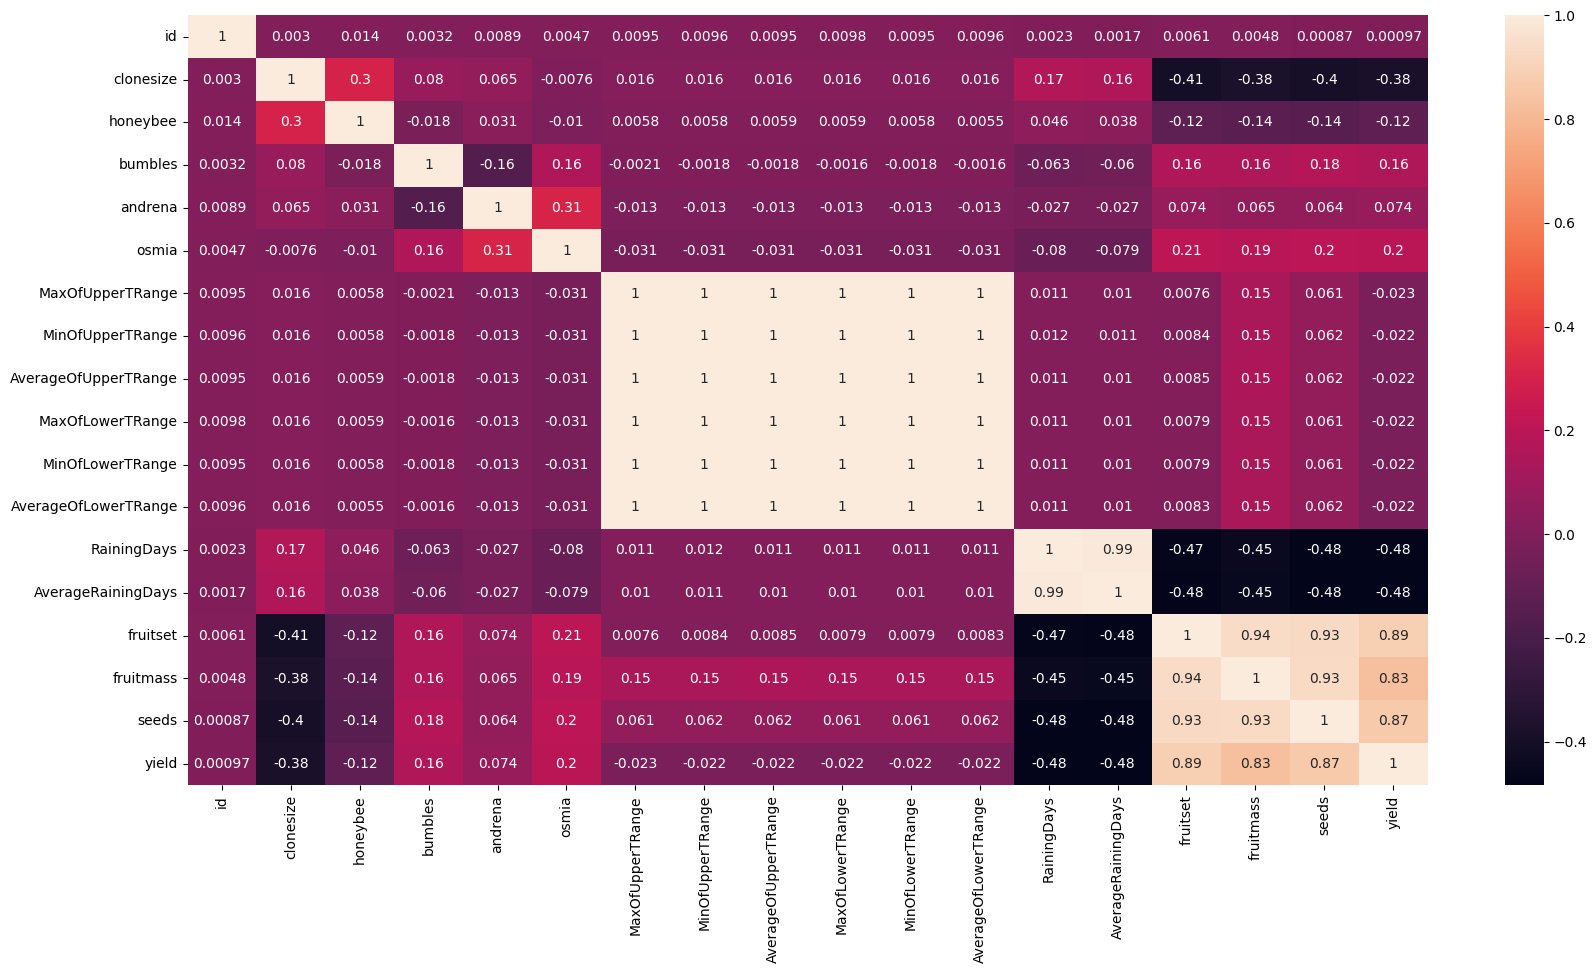

In [9]:
# pd.plotting.scatter_matrix(train)
# plt.show()
plt.figure(figsize=(20,10))
sns.heatmap(train.corr() , annot=True)
plt.show()

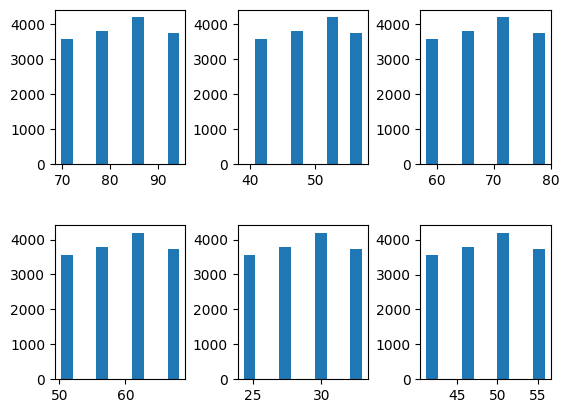

In [33]:

hist_li_col = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.hist(x=train[hist_li_col[i-1]],bins=10)


In [34]:
train = train.drop(['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange'],axis=1)
test = test.drop(['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange'],axis=1)

In [36]:
# train.drop('id',axis=1, inplace=True)
Y = train['yield']
X = train.drop(['yield','id'],axis=1)
# test = test.drop('yield',axis=1)

In [37]:
X.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

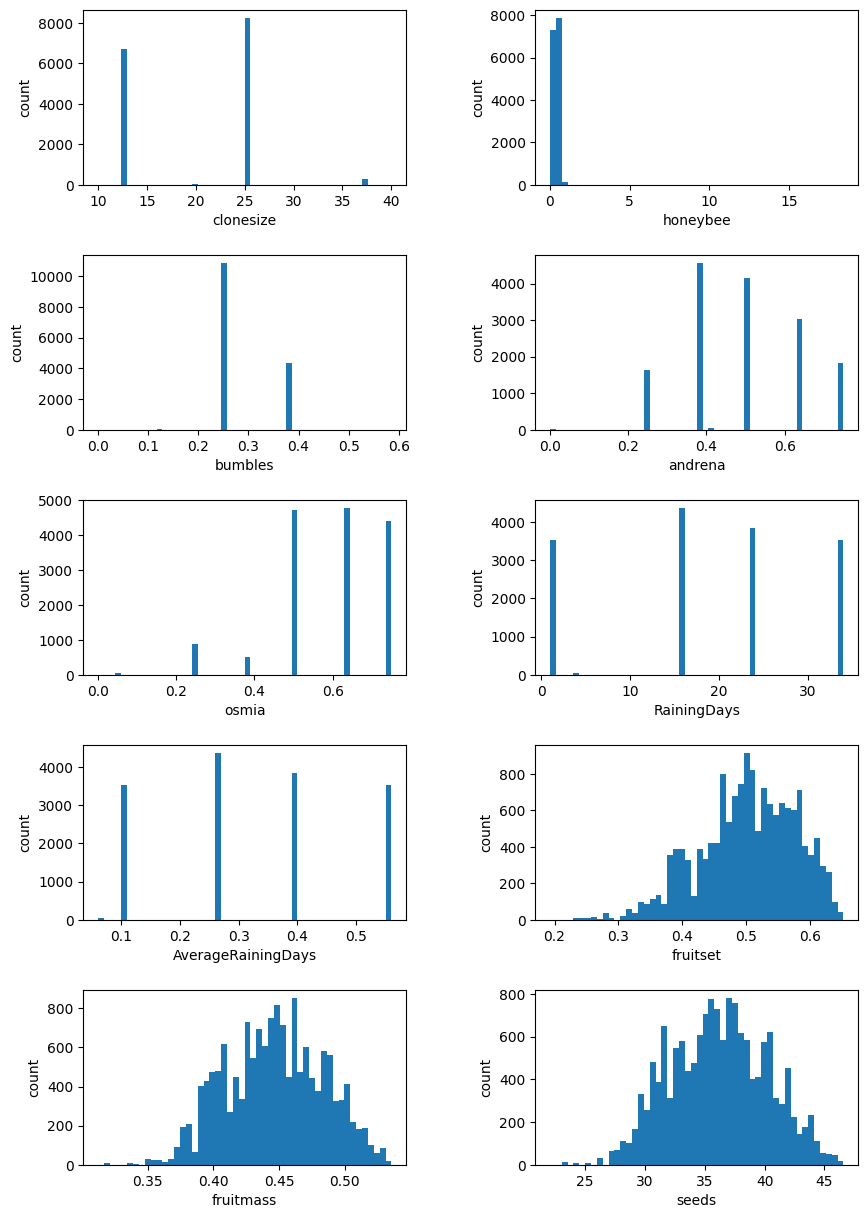

In [50]:

fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,11):
    ax = fig.add_subplot(5,2,i)
    ax.hist(x=X[X.columns[i-1]],bins=50)
    ax.set_xlabel(X.columns[i-1])
    ax.set_ylabel('count')


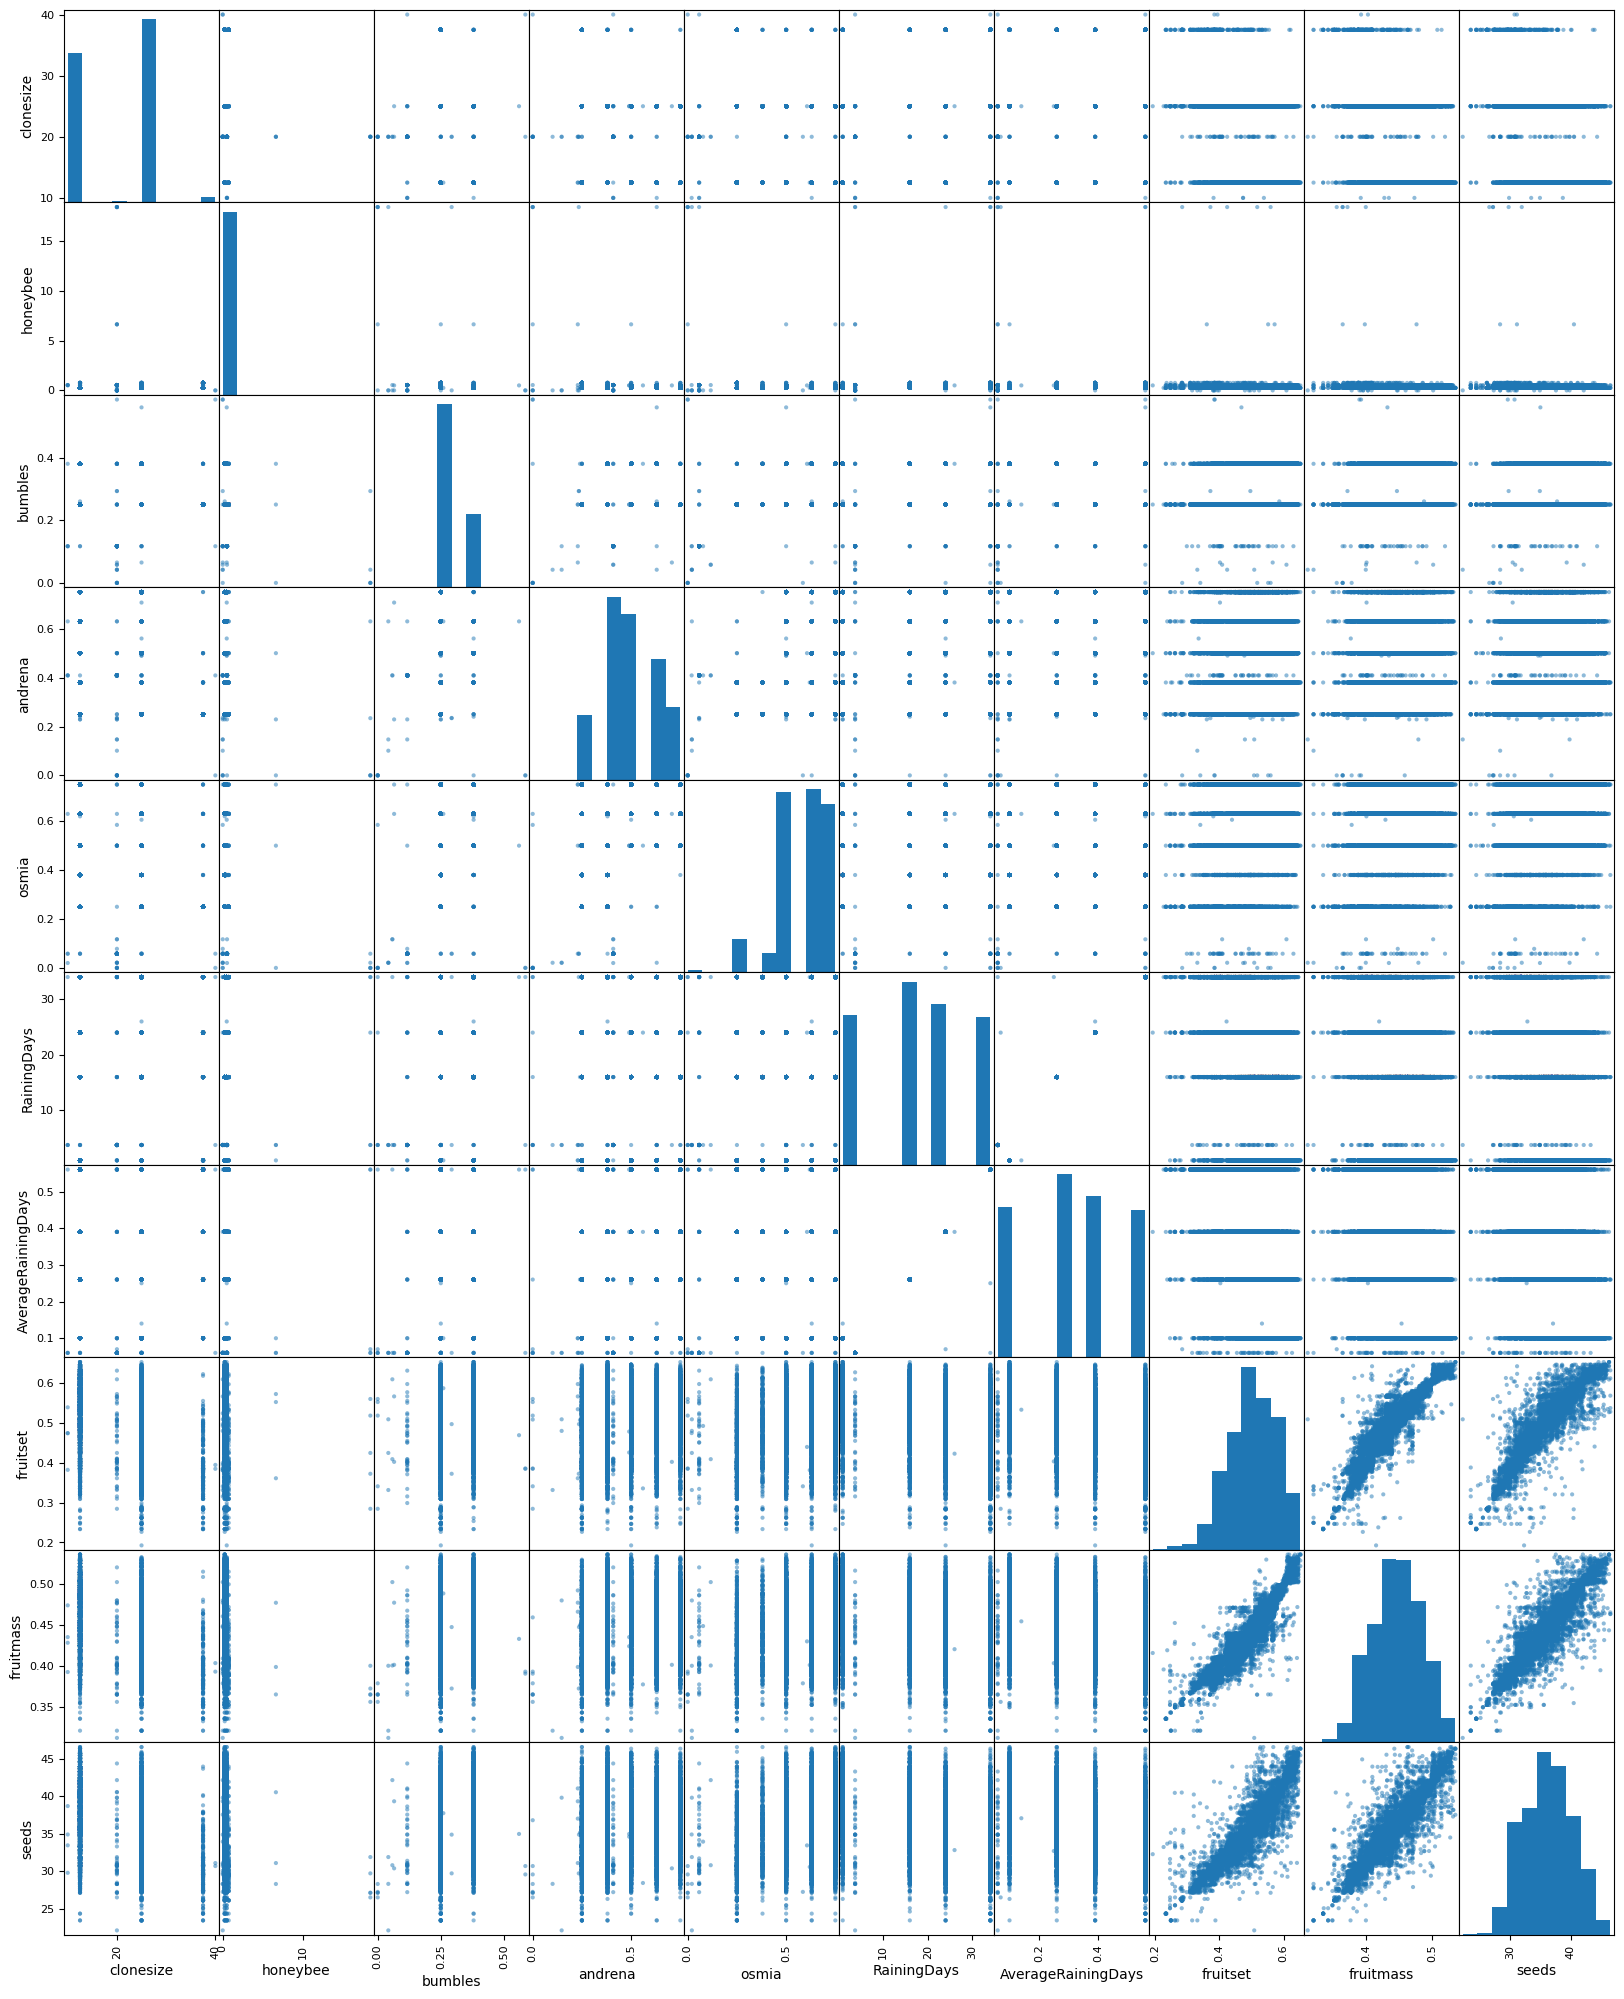

In [56]:
pd.plotting.scatter_matrix(train,figsize=(20,25))
plt.show()

In [59]:
X.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

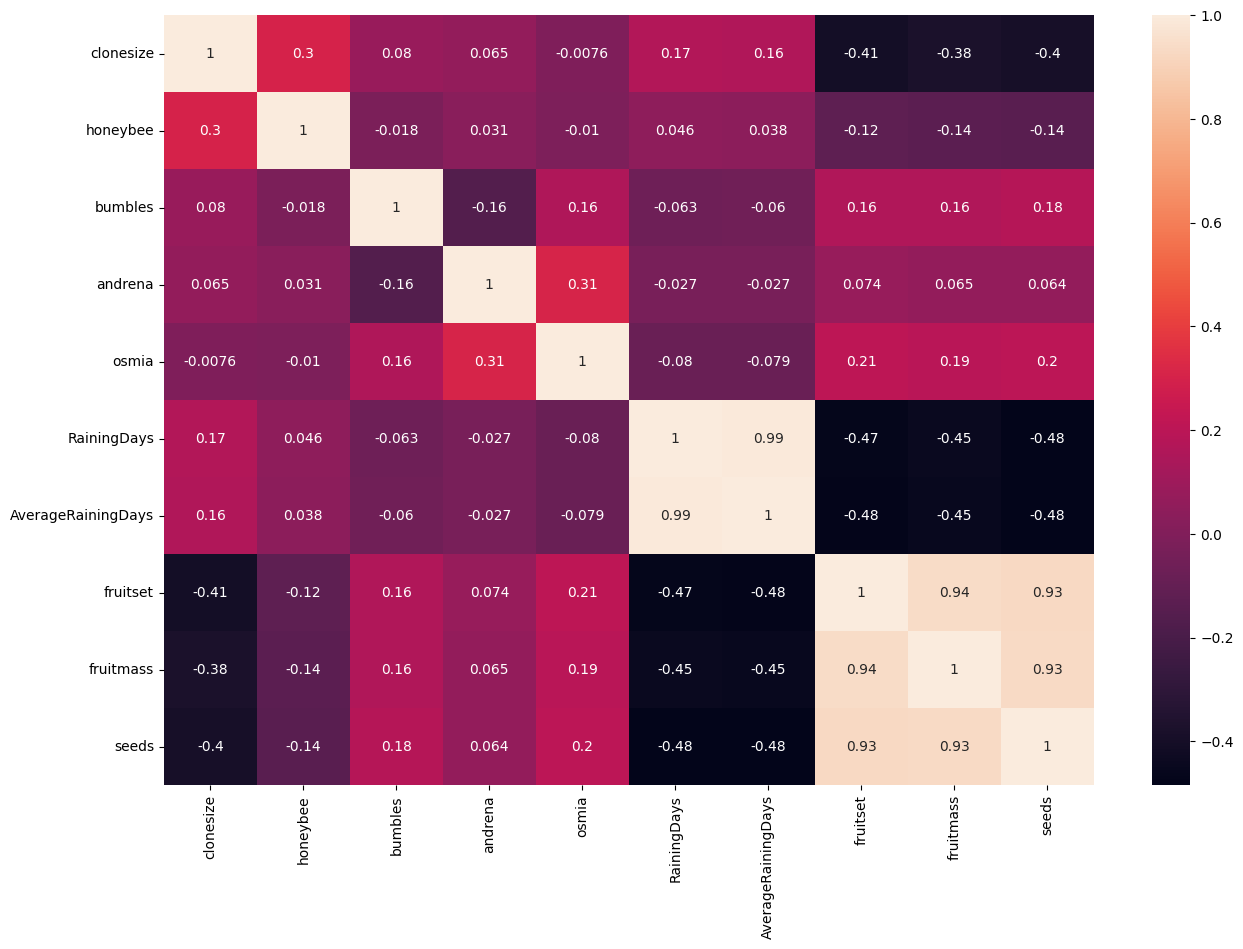

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr() , annot=True)
plt.show()

In [62]:
X = X.drop(['andrena'],axis=1)

In [66]:
cb = CatBoostRegressor(random_state = 0,
                       n_estimators=2000,
                       objective = 'MAE', 
                       verbose = 0).fit(X,Y)


In [67]:
test_1 = test.copy()
test_id = np.array(test_1['id'])
test_x = test.drop(['id'],axis=1)

In [68]:


mean_absolute_error(Y,cb.predict(X))

311.65321062443326

In [ ]:
test_pred = cb.predict(test_x)
# output = pd.DataFrame(test_id,test_pred)
output = pd.DataFrame(columns=['id','yield'])
output['id'] = test_id
output['yield'] =test_pred

output.to_csv('submission.csv',index=False)